In [64]:
from keras import layers
from keras import models
from keras import losses
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model.add(layers.Dense(units= 64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                36928     
__________

In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels) #Converts a class vector (integers) to binary class matrix.
test_labels = to_categorical(test_labels)

In [30]:
X_train = train_images[:6000, :, :]
X_train_labels = train_labels[:6000, :]

X_valid = train_images[6000:7000, :, :]
X_valid_labels= train_labels[6000:7000, :]

X_test = test_images[:1000, :, :]
X_test_labels = test_labels[:1000, :]

In [31]:
print(X_train.shape)

(6000, 28, 28, 1)


In [32]:
print(X_train_labels.shape)

(6000, 10)


In [33]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 4s 723us/step - loss: 0.8072 - acc: 0.7367 - val_loss: 0.3917 - val_acc: 0.8730
Epoch 2/10
6000/6000 [==============================] - 4s 626us/step - loss: 0.2458 - acc: 0.9253 - val_loss: 0.2173 - val_acc: 0.9280
Epoch 3/10
6000/6000 [==============================] - 4s 625us/step - loss: 0.1557 - acc: 0.9507 - val_loss: 0.1471 - val_acc: 0.9510
Epoch 4/10
6000/6000 [==============================] - 4s 637us/step - loss: 0.1213 - acc: 0.9613 - val_loss: 0.1413 - val_acc: 0.9590
Epoch 5/10
6000/6000 [==============================] - 4s 698us/step - loss: 0.0884 - acc: 0.9732 - val_loss: 0.1213 - val_acc: 0.9680
Epoch 6/10
6000/6000 [==============================] - 4s 706us/step - loss: 0.0707 - acc: 0.9785 - val_loss: 0.1048 - val_acc: 0.9680
Epoch 7/10
6000/6000 [==============================] - 4s 705us/step - loss: 0.0631 - acc: 0.9787 - val_loss: 0.1486 - val_acc: 0.9570


In [34]:
test_loss, test_acc = model.evaluate(X_test, X_test_labels)
test_acc

1000/1000 [==============================] - 0s 324us/step


0.963

## Primeiro modelo : logarithmic_error

In [12]:
model1 = models.Sequential()
model1.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

In [14]:
model1.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model1.add(layers.Dense(units= 64, activation='relu'))
model1.add(layers.Dense(units=10, activation='softmax'))

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels) #Converts a class vector (integers) to binary class matrix.
test_labels = to_categorical(test_labels)

In [16]:
X_train = train_images[:6000, :, :]
X_train_labels = train_labels[:6000, :]

X_valid = train_images[6000:7000, :, :]
X_valid_labels= train_labels[6000:7000, :]

X_test = test_images[:1000, :, :]
X_test_labels = test_labels[:1000, :]

In [19]:
model1.compile(optimizer=optimizers.adagrad(),
loss=losses.mean_squared_logarithmic_error,
metrics=['accuracy'])
history = model1.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 4s 745us/step - loss: 0.0233 - acc: 0.6593 - val_loss: 0.0055 - val_acc: 0.9290
Epoch 2/10
6000/6000 [==============================] - 4s 638us/step - loss: 0.0046 - acc: 0.9405 - val_loss: 0.0033 - val_acc: 0.9560
Epoch 3/10
6000/6000 [==============================] - 4s 665us/step - loss: 0.0031 - acc: 0.9590 - val_loss: 0.0026 - val_acc: 0.9680
Epoch 4/10
6000/6000 [==============================] - 4s 636us/step - loss: 0.0024 - acc: 0.9695 - val_loss: 0.0025 - val_acc: 0.9690
Epoch 5/10
6000/6000 [==============================] - 4s 649us/step - loss: 0.0021 - acc: 0.9738 - val_loss: 0.0028 - val_acc: 0.9640
Epoch 6/10
6000/6000 [==============================] - 4s 712us/step - loss: 0.0018 - acc: 0.9783 - val_loss: 0.0022 - val_acc: 0.9700
Epoch 7/10
6000/6000 [==============================] - 4s 711us/step - loss: 0.0014 - acc: 0.9823 - val_loss: 0.0020 - val_acc: 0.9770


In [23]:
test_loss_le1, test_acc_le1 = model1.evaluate(X_test, X_test_labels)
test_acc_le1

1000/1000 [==============================] - 0s 318us/step


0.966

In [20]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model2.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model2.add(layers.Dense(units= 64, activation='relu'))
model2.add(layers.Dense(units=10, activation='softmax'))

In [41]:
model2.compile(optimizer=optimizers.nadam(),
loss=losses.mean_squared_logarithmic_error,
metrics=['accuracy'])
history = model2.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 835us/step - loss: 0.0025 - acc: 0.9648 - val_loss: 0.0034 - val_acc: 0.9570
Epoch 2/10
6000/6000 [==============================] - 4s 678us/step - loss: 0.0025 - acc: 0.9678 - val_loss: 0.0028 - val_acc: 0.9660
Epoch 3/10
6000/6000 [==============================] - 4s 646us/step - loss: 0.0021 - acc: 0.9742 - val_loss: 0.0023 - val_acc: 0.9710
Epoch 4/10
6000/6000 [==============================] - 4s 629us/step - loss: 0.0021 - acc: 0.9752 - val_loss: 0.0027 - val_acc: 0.9660
Epoch 5/10
6000/6000 [==============================] - 4s 667us/step - loss: 0.0023 - acc: 0.9730 - val_loss: 0.0035 - val_acc: 0.9590
Epoch 6/10
6000/6000 [==============================] - 4s 702us/step - loss: 0.0035 - acc: 0.9608 - val_loss: 0.0082 - val_acc: 0.9090
Epoch 7/10
6000/6000 [==============================] - 4s 732us/step - loss: 0.0058 - acc: 0.9368 - val_loss: 0.0056 - val_acc: 0.9410


In [42]:
test_loss_le2, test_acc_le2 = model2.evaluate(X_test, X_test_labels)
test_acc_le2

1000/1000 [==============================] - 0s 327us/step


0.865

In [36]:
model3 = models.Sequential()
model3.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model3.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model3.add(layers.Dense(units= 64, activation='relu'))
model3.add(layers.Dense(units=10, activation='softmax'))

In [37]:
model3.compile(optimizer=optimizers.SGD(),
loss=losses.mean_squared_logarithmic_error,
metrics=['accuracy'])
history = model3.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 764us/step - loss: 0.0440 - acc: 0.0738 - val_loss: 0.0440 - val_acc: 0.0570
Epoch 2/10
6000/6000 [==============================] - 4s 673us/step - loss: 0.0440 - acc: 0.0765 - val_loss: 0.0440 - val_acc: 0.0590
Epoch 3/10
6000/6000 [==============================] - 4s 731us/step - loss: 0.0440 - acc: 0.0795 - val_loss: 0.0440 - val_acc: 0.0620
Epoch 4/10
6000/6000 [==============================] - 4s 681us/step - loss: 0.0440 - acc: 0.0813 - val_loss: 0.0440 - val_acc: 0.0650
Epoch 5/10
6000/6000 [==============================] - 4s 708us/step - loss: 0.0440 - acc: 0.0842 - val_loss: 0.0440 - val_acc: 0.0670
Epoch 6/10
6000/6000 [==============================] - 4s 708us/step - loss: 0.0440 - acc: 0.0858 - val_loss: 0.0440 - val_acc: 0.0710
Epoch 7/10
6000/6000 [==============================] - 4s 708us/step - loss: 0.0440 - acc: 0.0897 - val_loss: 0.0439 - val_acc: 0.0750


In [39]:
test_loss_le3, test_acc_le3 = model3.evaluate(X_test, X_test_labels)
test_acc_le3

1000/1000 [==============================] - 0s 341us/step


0.09

## Segundo modelo: hinge

In [43]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model4.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model4.add(layers.Dense(units= 64, activation='relu'))
model4.add(layers.Dense(units=10, activation='softmax'))

In [45]:
model4.compile(optimizer=optimizers.adagrad(),
loss=losses.hinge,
metrics=['accuracy'])
history = model4.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 780us/step - loss: 0.9648 - acc: 0.3573 - val_loss: 0.9351 - val_acc: 0.6540
Epoch 2/10
6000/6000 [==============================] - 4s 689us/step - loss: 0.9339 - acc: 0.6663 - val_loss: 0.9316 - val_acc: 0.6880
Epoch 3/10
6000/6000 [==============================] - 4s 722us/step - loss: 0.9323 - acc: 0.6800 - val_loss: 0.9309 - val_acc: 0.6930
Epoch 4/10
6000/6000 [==============================] - 4s 726us/step - loss: 0.9316 - acc: 0.6862 - val_loss: 0.9308 - val_acc: 0.6950
Epoch 5/10
6000/6000 [==============================] - 5s 839us/step - loss: 0.9313 - acc: 0.6887 - val_loss: 0.9302 - val_acc: 0.7010
Epoch 6/10
6000/6000 [==============================] - 5s 783us/step - loss: 0.9310 - acc: 0.6903 - val_loss: 0.9302 - val_acc: 0.7000
Epoch 7/10
6000/6000 [==============================] - 5s 773us/step - loss: 0.9309 - acc: 0.6923 - val_loss: 0.9301 - val_acc: 0.7030


In [46]:
test_loss_le4, test_acc_le4 = model4.evaluate(X_test, X_test_labels)
test_acc_le4

1000/1000 [==============================] - 0s 331us/step


0.689

In [47]:
model5 = models.Sequential()
model5.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model5.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model5.add(layers.Dense(units= 64, activation='relu'))
model5.add(layers.Dense(units=10, activation='softmax'))

In [48]:
model5.compile(optimizer=optimizers.nadam(),
loss=losses.hinge,
metrics=['accuracy'])
history = model5.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 852us/step - loss: 0.9626 - acc: 0.3845 - val_loss: 0.9465 - val_acc: 0.5360
Epoch 2/10
6000/6000 [==============================] - 4s 717us/step - loss: 0.9480 - acc: 0.5198 - val_loss: 0.9523 - val_acc: 0.4770
Epoch 3/10
6000/6000 [==============================] - 4s 681us/step - loss: 0.9504 - acc: 0.4960 - val_loss: 0.9537 - val_acc: 0.4630
Epoch 4/10
6000/6000 [==============================] - 4s 686us/step - loss: 0.9476 - acc: 0.5237 - val_loss: 0.9465 - val_acc: 0.5350
Epoch 5/10
6000/6000 [==============================] - 5s 766us/step - loss: 0.9557 - acc: 0.4430 - val_loss: 0.9541 - val_acc: 0.4590
Epoch 6/10
6000/6000 [==============================] - 5s 823us/step - loss: 0.9505 - acc: 0.4948 - val_loss: 0.9459 - val_acc: 0.5410
Epoch 7/10
6000/6000 [==============================] - 5s 769us/step - loss: 0.9570 - acc: 0.4303 - val_loss: 0.9591 - val_acc: 0.4090


In [49]:
test_loss_le5, test_acc_le5 = model5.evaluate(X_test, X_test_labels)
test_acc_le5

1000/1000 [==============================] - 0s 453us/step


0.524

In [50]:
model6 = models.Sequential()
model6.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model6.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model6.add(layers.Dense(units= 64, activation='relu'))
model6.add(layers.Dense(units=10, activation='softmax'))

In [51]:
model6.compile(optimizer=optimizers.SGD(),
loss=losses.hinge,
metrics=['accuracy'])
history = model6.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 6s 966us/step - loss: 0.9900 - acc: 0.0972 - val_loss: 0.9900 - val_acc: 0.0990
Epoch 2/10
6000/6000 [==============================] - 5s 764us/step - loss: 0.9900 - acc: 0.0977 - val_loss: 0.9900 - val_acc: 0.0990
Epoch 3/10
6000/6000 [==============================] - 5s 764us/step - loss: 0.9900 - acc: 0.0990 - val_loss: 0.9900 - val_acc: 0.0990
Epoch 4/10
6000/6000 [==============================] - 5s 805us/step - loss: 0.9900 - acc: 0.0997 - val_loss: 0.9900 - val_acc: 0.0990
Epoch 5/10
6000/6000 [==============================] - 5s 875us/step - loss: 0.9900 - acc: 0.0997 - val_loss: 0.9899 - val_acc: 0.0990
Epoch 6/10
6000/6000 [==============================] - 6s 981us/step - loss: 0.9900 - acc: 0.1000 - val_loss: 0.9899 - val_acc: 0.0990
Epoch 7/10
6000/6000 [==============================] - 5s 778us/step - loss: 0.9899 - acc: 0.1005 - val_loss: 0.9899 - val_acc: 0.0990


In [52]:
test_loss_le6, test_acc_le6 = model6.evaluate(X_test, X_test_labels)
test_acc_le6

1000/1000 [==============================] - 0s 406us/step


0.091

## Terceiro modelo: poisson

In [53]:
model7 = models.Sequential()
model7.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model7.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model7.add(layers.Dense(units= 64, activation='relu'))
model7.add(layers.Dense(units=10, activation='softmax'))

In [60]:
model7.compile(optimizer=optimizers.adagrad(),
loss=losses.poisson,
metrics=['accuracy'])
history = model7.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 916us/step - loss: 0.1709 - acc: 0.7878 - val_loss: 0.1188 - val_acc: 0.9420
Epoch 2/10
6000/6000 [==============================] - 4s 747us/step - loss: 0.1164 - acc: 0.9528 - val_loss: 0.1116 - val_acc: 0.9680
Epoch 3/10
6000/6000 [==============================] - 4s 740us/step - loss: 0.1108 - acc: 0.9658 - val_loss: 0.1126 - val_acc: 0.9630
Epoch 4/10
6000/6000 [==============================] - 5s 792us/step - loss: 0.1087 - acc: 0.9738 - val_loss: 0.1100 - val_acc: 0.9700
Epoch 5/10
6000/6000 [==============================] - 5s 818us/step - loss: 0.1070 - acc: 0.9787 - val_loss: 0.1086 - val_acc: 0.9740
Epoch 6/10
6000/6000 [==============================] - 5s 764us/step - loss: 0.1057 - acc: 0.9805 - val_loss: 0.1091 - val_acc: 0.9740
Epoch 7/10
6000/6000 [==============================] - 5s 750us/step - loss: 0.1046 - acc: 0.9852 - val_loss: 0.1094 - val_acc: 0.9750


In [61]:
test_loss_le7, test_acc_le7 = model7.evaluate(X_test, X_test_labels)
test_acc_le7

1000/1000 [==============================] - 0s 312us/step


0.974

In [54]:
model8 = models.Sequential()
model8.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model8.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model8.add(layers.Dense(units= 64, activation='relu'))
model8.add(layers.Dense(units=10, activation='softmax'))

In [56]:
model8.compile(optimizer=optimizers.nadam(),
loss=losses.poisson,
metrics=['accuracy'])
history = model8.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 5s 871us/step - loss: 0.1650 - acc: 0.7958 - val_loss: 0.1288 - val_acc: 0.9130
Epoch 2/10
6000/6000 [==============================] - 4s 698us/step - loss: 0.1152 - acc: 0.9555 - val_loss: 0.1143 - val_acc: 0.9560
Epoch 3/10
6000/6000 [==============================] - 4s 683us/step - loss: 0.1095 - acc: 0.9722 - val_loss: 0.1128 - val_acc: 0.9650
Epoch 4/10
6000/6000 [==============================] - 4s 698us/step - loss: 0.1067 - acc: 0.9783 - val_loss: 0.1096 - val_acc: 0.9780
Epoch 5/10
6000/6000 [==============================] - 5s 792us/step - loss: 0.1046 - acc: 0.9868 - val_loss: 0.1169 - val_acc: 0.9600
Epoch 6/10
6000/6000 [==============================] - 5s 836us/step - loss: 0.1035 - acc: 0.9888 - val_loss: 0.1095 - val_acc: 0.9750
Epoch 7/10
6000/6000 [==============================] - 5s 764us/step - loss: 0.1025 - acc: 0.9928 - val_loss: 0.1125 - val_acc: 0.9730


In [62]:
test_loss_le8, test_acc_le8 = model8.evaluate(X_test, X_test_labels)
test_acc_le8

1000/1000 [==============================] - 0s 315us/step


0.974

In [57]:
model9 = models.Sequential()
model9.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))

model9.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model9.add(layers.Dense(units= 64, activation='relu'))
model9.add(layers.Dense(units=10, activation='softmax'))

In [58]:
model9.compile(optimizer=optimizers.SGD(),
loss=losses.poisson,
metrics=['accuracy'])
history = model9.fit(X_train, X_train_labels, epochs=10, batch_size=64, validation_data=(X_valid, X_valid_labels))

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 6s 932us/step - loss: 0.3306 - acc: 0.1363 - val_loss: 0.3303 - val_acc: 0.1500
Epoch 2/10
6000/6000 [==============================] - 5s 767us/step - loss: 0.3300 - acc: 0.1658 - val_loss: 0.3297 - val_acc: 0.1750
Epoch 3/10
6000/6000 [==============================] - 5s 813us/step - loss: 0.3295 - acc: 0.1943 - val_loss: 0.3292 - val_acc: 0.2040
Epoch 4/10
6000/6000 [==============================] - 5s 811us/step - loss: 0.3290 - acc: 0.2077 - val_loss: 0.3287 - val_acc: 0.2220
Epoch 5/10
6000/6000 [==============================] - 5s 760us/step - loss: 0.3285 - acc: 0.2308 - val_loss: 0.3282 - val_acc: 0.2400
Epoch 6/10
6000/6000 [==============================] - 5s 763us/step - loss: 0.3280 - acc: 0.2603 - val_loss: 0.3277 - val_acc: 0.2600
Epoch 7/10
6000/6000 [==============================] - 5s 767us/step - loss: 0.3274 - acc: 0.2885 - val_loss: 0.3271 - val_acc: 0.2800


In [63]:
test_loss_le9, test_acc_le9 = model9.evaluate(X_test, X_test_labels)
test_acc_le9

1000/1000 [==============================] - 0s 313us/step


0.284

## Modelo 1 foi o melhor. Loss = mean_squared_logarithmic_error, optimizer = adagrad

In [65]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

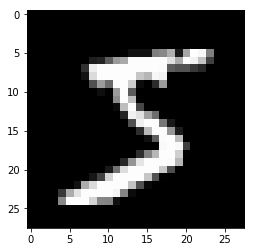

In [66]:
imgplot = plt.imshow(image.array_to_img(X_train[0]))
plt.show()

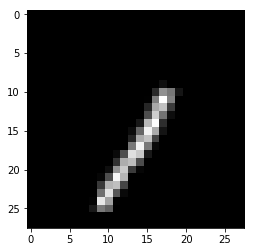

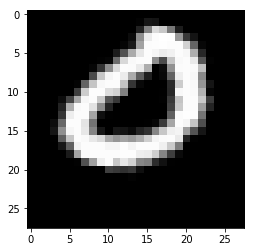

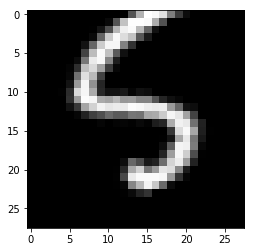

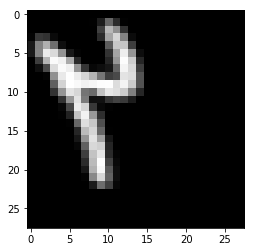

In [70]:
i = 0;
for batch in datagen.flow(X_train, batch_size=20):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Dropout

In [71]:
modelf = models.Sequential()
modelf.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #(image_height, image_width, image_channels) (not including the batch dimension).
modelf.add(layers.MaxPooling2D((2, 2)))
modelf.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
modelf.add(layers.MaxPooling2D((2, 2)))
modelf.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
modelf.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
modelf.add(layers.Dropout(0.5))
modelf.add(layers.Dense(units= 64, activation='relu'))
modelf.add(layers.Dense(units=10, activation='softmax'))

In [75]:
modelf.compile(optimizer=optimizers.adagrad(),
loss=losses.mean_squared_logarithmic_error,
metrics=['accuracy'])

In [76]:
train_datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

history = model.fit_generator(datagen.flow(X_train, X_train_labels, batch_size=12), epochs=5, validation_data=(X_valid, X_valid_labels))
#Generate batches of tensor image data with real-time data augmentation. (6000/12 = 500)

Epoch 1/5
500/500 [==============================] - 10s 20ms/step - loss: 1.2736 - acc: 0.5695 - val_loss: 0.3775 - val_acc: 0.9030
Epoch 2/5
500/500 [==============================] - 10s 20ms/step - loss: 0.9943 - acc: 0.6742 - val_loss: 0.2821 - val_acc: 0.9160
Epoch 3/5
500/500 [==============================] - 11s 22ms/step - loss: 0.8353 - acc: 0.7338 - val_loss: 0.2389 - val_acc: 0.9300
Epoch 4/5
500/500 [==============================] - 10s 20ms/step - loss: 0.7255 - acc: 0.7642 - val_loss: 0.2141 - val_acc: 0.9350
Epoch 5/5
500/500 [==============================] - 10s 20ms/step - loss: 0.6622 - acc: 0.7893 - val_loss: 0.2076 - val_acc: 0.9390


In [77]:
test_lossf, test_accf = modelf.evaluate(X_test, X_test_labels)
test_accf

1000/1000 [==============================] - 1s 529us/step


0.971